#10. 딥러닝 프로젝트

## 10-2. Boston 주택 가격 예측 모델

### 데이터 로드 및 전처리

In [40]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [41]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [42]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
import numpy as np
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data =train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data =train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data =test_data / std

print(train_data)
print(test_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]
[[ 1.55369355 -0.48361547  1.0283258  ...  0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773 ... -0.30759583  0.42733126
   0.47880119]
 [-0.39982927 -0.48361547 -0.86940196 ...  0.78447637  0.44807713
  -0.41415936]
 ...
 [-0.20709507 -0.48361547  1.24588095 ... -1.71818909  0.37051949
  -1.49344089]
 [-0.36698601 -0.48361547 -0.72093526 ... -0.48960787  0.39275481
  -0.41829982]
 [-0.0889679  -0.48361547  1.24588095 ... -1.71818909 -1.21946544
  -0.40449827]]


### 모델 구성 및 컴파일

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 13)                182       
                                                                 
 dropout_12 (Dropout)        (None, 13)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                896       
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


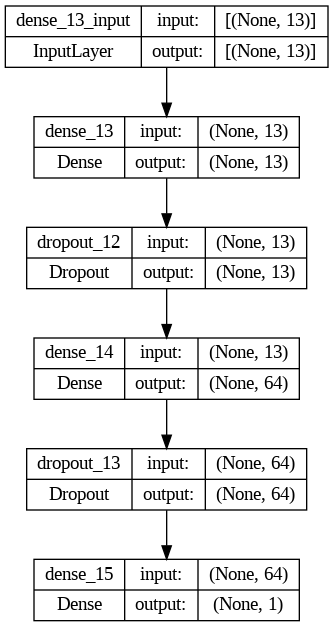

In [43]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
import tensorflow as tf
from tensorflow.keras import models, layers,utils

model = models.Sequential()
model.add(layers.Dense(13, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
model.summary()
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [44]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras import callbacks

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels,
                     epochs=60,
                     validation_data=(test_data, test_labels),
                     callbacks=[early_stopping_cb])

Epoch 1/60
13/13 [==============================] - 1s 17ms/step - loss: 581.4560 - mae: 22.2966 - val_loss: 606.3230 - val_mae: 22.9005
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 566.0855 - mae: 21.9701 - val_loss: 583.1902 - val_mae: 22.4019
Epoch 3/60
13/13 [==============================] - 0s 7ms/step - loss: 539.4396 - mae: 21.3754 - val_loss: 553.3144 - val_mae: 21.7267
Epoch 4/60
13/13 [==============================] - 0s 8ms/step - loss: 510.6003 - mae: 20.6281 - val_loss: 516.1101 - val_mae: 20.8487
Epoch 5/60
13/13 [==============================] - 0s 6ms/step - loss: 470.3639 - mae: 19.6517 - val_loss: 470.5714 - val_mae: 19.7170
Epoch 6/60
13/13 [==============================] - 0s 6ms/step - loss: 420.3851 - mae: 18.2903 - val_loss: 413.2785 - val_mae: 18.2166
Epoch 7/60
13/13 [==============================] - 0s 6ms/step - loss: 355.0783 - mae: 16.5696 - val_loss: 346.6579 - val_mae: 16.5019
Epoch 8/60
13/13 [=============================

<ipython-input-45-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


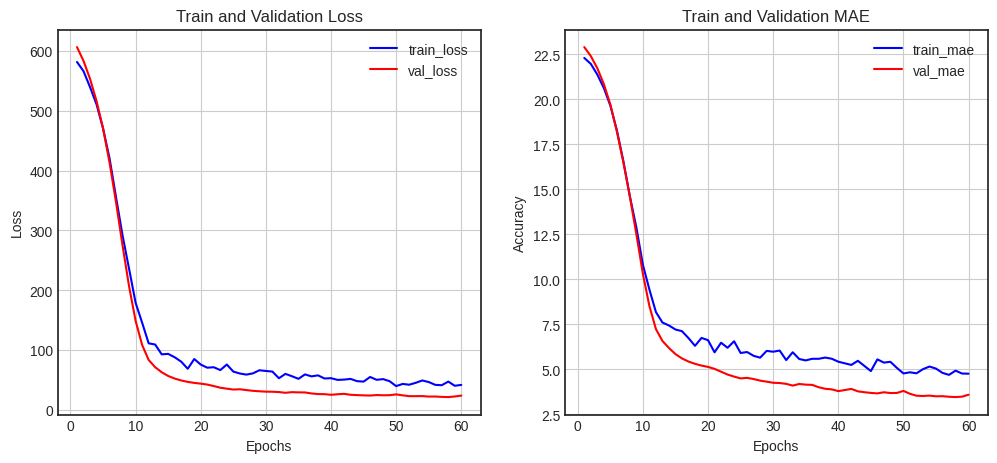

In [45]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [46]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 24.2413 - mae: 3.5924


[24.24127769470215, 3.5924127101898193]

## 10-3. Reuters 딥러닝 모델

## 데이터 로드 및 전처리

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [19]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data,val_data,train_labels,val_labels = train_test_split(train_data,train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [20]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

train_data = one_hot_encoding(train_data)
val_data = one_hot_encoding(val_data)
test_data = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)
val_labels = utils.to_categorical(val_labels)

### 모델 구성 및 컴파일

In [21]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

### 모델 학습

In [23]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from tensorflow.keras import callbacks
model.save('reuters.h5')
check_point_cb = callbacks.ModelCheckpoint('reuters.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=60,
                    validation_data=(val_data, val_labels),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 4s 8ms/step - loss: 1.7982 - accuracy: 0.6026 - val_loss: 1.3890 - val_accuracy: 0.7213
Epoch 2/60
211/211 [==============================] - 1s 6ms/step - loss: 1.0335 - accuracy: 0.7558 - val_loss: 0.9818 - val_accuracy: 0.7841
Epoch 3/60
211/211 [==============================] - 1s 7ms/step - loss: 0.7566 - accuracy: 0.8162 - val_loss: 0.8930 - val_accuracy: 0.8103
Epoch 4/60
211/211 [==============================] - 1s 6ms/step - loss: 0.5834 - accuracy: 0.8564 - val_loss: 0.8652 - val_accuracy: 0.8170
Epoch 5/60
211/211 [==============================] - 1s 6ms/step - loss: 0.4653 - accuracy: 0.8799 - val_loss: 0.8742 - val_accuracy: 0.8183
Epoch 6/60
211/211 [==============================] - 2s 8ms/step - loss: 0.3875 - accuracy: 0.9023 - val_loss: 0.8925 - val_accuracy: 0.8126
Epoch 7/60
211/211 [==============================] - 2s 7ms/step - loss: 0.3343 - accuracy: 0.9149 - val_loss: 0.9071 - val_accuracy: 0.8197
Epoch 

<ipython-input-24-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


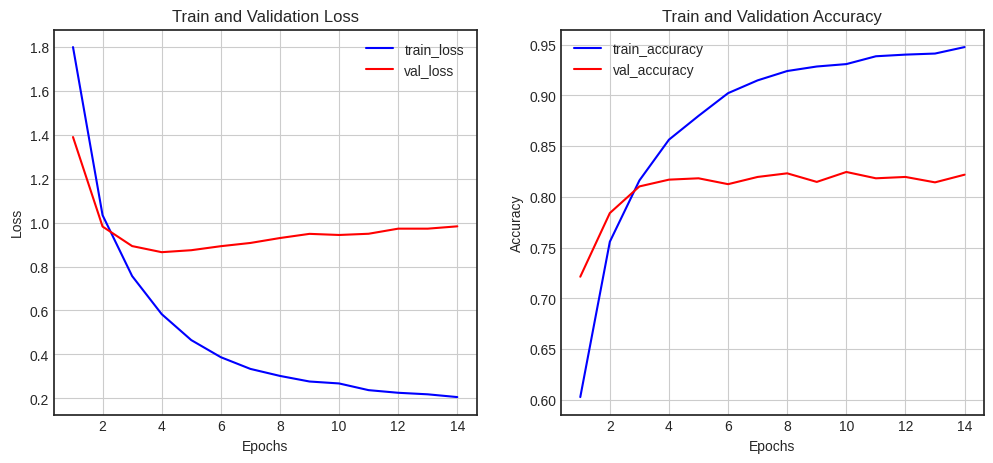

In [24]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [25]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 0.9337 - accuracy: 0.7956


[0.933688223361969, 0.7956367135047913]

## 10-4. CIFAR10 딥러닝 모델

### 데이터 로드 및 전처리

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [27]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full, test_size=0.20, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [28]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-29-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


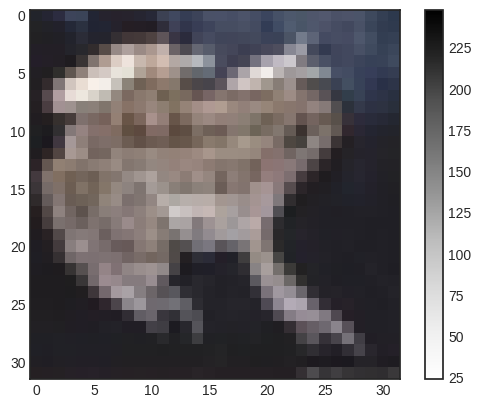

In [29]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [30]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

#레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [31]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [32]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일

In [33]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(3072, input_shape=(3072, )))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Activation('relu'))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Activation('relu'))

model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3072)              9440256   
                                                                 
 batch_normalization_2 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 3072)              0         
                                                                 
 activation_2 (Activation)   (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                      

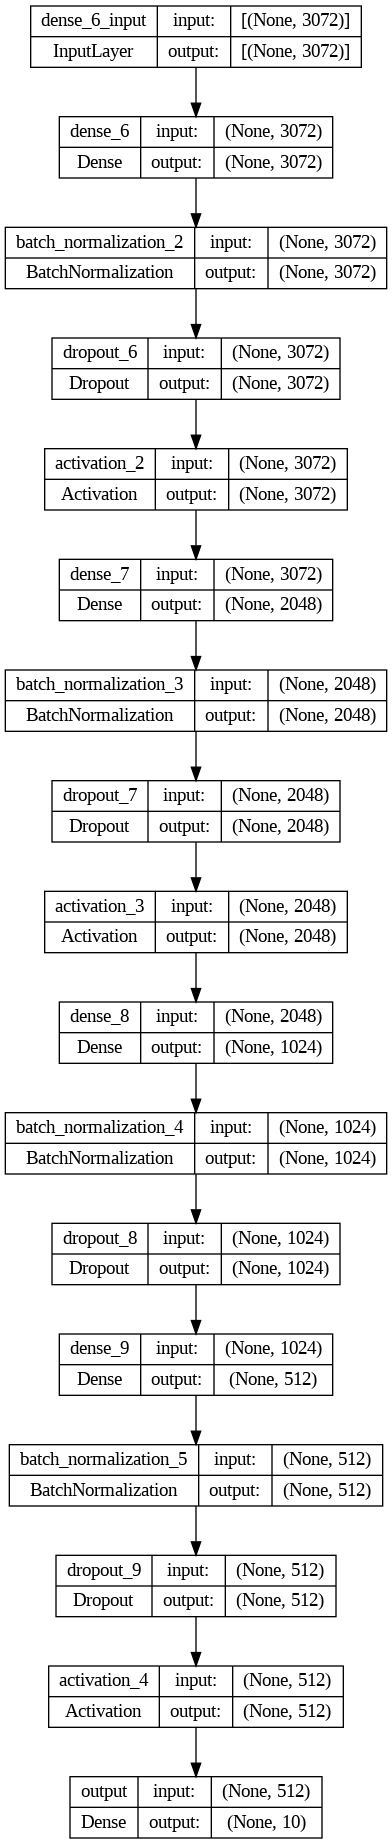

In [34]:
model.summary()
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [35]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from tensorflow.keras import callbacks
model.save('cirar10.h5')
check_point_cb = callbacks.ModelCheckpoint('cirar10.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 17s 10ms/step - loss: 1.9059 - accuracy: 0.3324 - val_loss: 1.9580 - val_accuracy: 0.3374
Epoch 2/60
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6342 - accuracy: 0.4202 - val_loss: 1.9484 - val_accuracy: 0.3410
Epoch 3/60
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5436 - accuracy: 0.4498 - val_loss: 1.5895 - val_accuracy: 0.4458
Epoch 4/60
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4924 - accuracy: 0.4688 - val_loss: 1.6257 - val_accuracy: 0.4284
Epoch 5/60
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4428 - accuracy: 0.4885 - val_loss: 1.5665 - val_accuracy: 0.4325
Epoch 6/60
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4026 - accuracy: 0.4994 - val_loss: 1.4354 - val_accuracy: 0.4844
Epoch 7/60
1250/1250 [==============================] - 11s 8ms/step - loss: 1.3577 - accuracy: 0.5170 - val_loss: 1.5915 - val_a

<ipython-input-36-0ea0e878b572>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


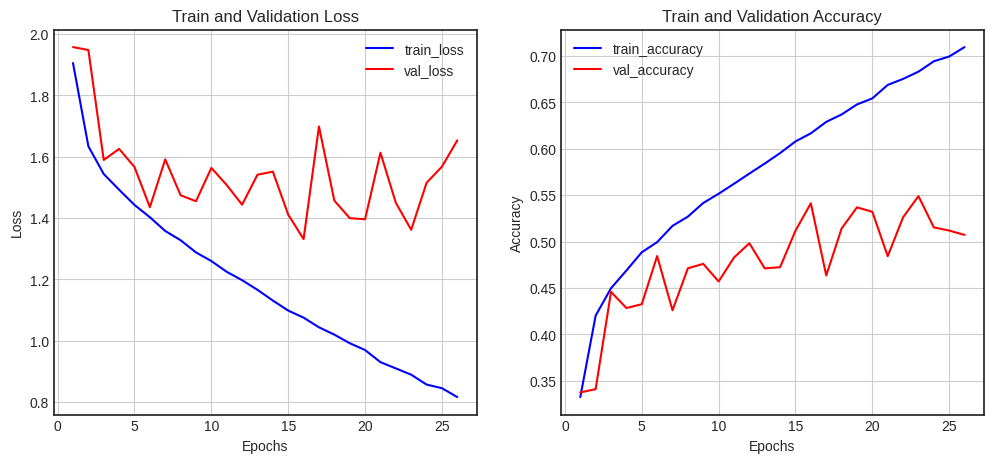

In [36]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [37]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3216 - accuracy: 0.5422


[1.3215851783752441, 0.5422000288963318]